### RANDOM NOTE:
The fact that lubrication + attractive electrostatic interactions strongly decrease the diffusivity of large particles which would (in my model) otherwise be "immune" to electrostatic interactions due to their finite range might be an explanation for the strong hindrance of p=1um particles for small large surface potentials in the data by Ribbeck et al. But also, this might be because my model does not really take into account surface potentials.
Note that for the strong lubrication+attractive U_0 effect to happen, I need to deactivate LJ and steric, such that the tracer particle and the rods may touch. Also: I still have to test if the strong effect might just be due to an error in the small cutoff for the infinite sum in lub2p.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
import itertools
plotmarkers=['^', 'o', 's', 'v', '*', 'd', '3', '<', 'h', '>', 'D', 'H']
%matplotlib inline

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)


# def pltDefaultPar():
#     #reset default matplotlib parameters for this notebook
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams['lines.linewidth'] = 1
#     plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 11})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootMAC


In [2]:
def stexp(x,a,n):
    return np.exp(-a*x**n)

In [3]:
def plotdataArr(dataArray,xlabel,lineArr,lineParam='',title='',linestyles='',setlog='',legendloc=0,tofile=False,filename='test',xlim=None):
    # color stuff: http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
    pltPrintPar()
    colors=cm.rainbow(np.linspace(0,1,len(dataArray)))
    if linestyles=='': lslist = len(dataArray) * ['o-']
    else: lslist = linestyles
    plt.figure()
    for i, line in enumerate(dataArray):
        ti = lineParam + str(lineArr[i])
        xs = line[:,0]
        dd0s = line[:,1]/6.
        plt.plot(xs,dd0s,lslist[i],label=ti,c=colors[i])
    plt.xlabel(r'$'+xlabel+'$')
    plt.ylabel(r'$D/D_0$')
    plt.ylim([0,1.15])
    plt.xlim(xlim)
    plt.title(title)
    #plt.legend(loc=legendloc, bbox_to_anchor=(0.5, 1.2), ncol=3)
    plt.legend(loc=legendloc,fontsize = 'medium')
    if setlog=='y' or setlog=="double":
        plt.yscale('log')
    if setlog=='x' or setlog=="double":
        plt.xscale('log')
    if tofile==True:
        pp = PdfPages('figures/'+filename+'.pdf')
        pp.savefig(bbox_inches='tight')
        pp.close()
    else:
        plt.show()

In [4]:
# Function to plot D over p vary lub noLub data with fixed aop
def plotDopvarylub(dataArrs,labels,loglog=False,legendloc=0,tofile=False,filename='test',fitexp=False,plotfit=False,lt='o-'):
    plt.figure()
    for i,data in enumerate(dataArrs):
        dd0s=data[:,1]/6.
        prels=data[:,0]
        if loglog==True:
            plt.loglog(prels,np.abs(np.log(dd0s)),lt,label=labels[i])
            plt.xlabel("$\log(p/b)$")
            plt.ylabel("$\log(|\log(D/D_0)|)$")
        else:
            plt.plot(prels,dd0s,lt,label=labels[i])
            plt.ylim([0,1.3])
            plt.xlim([0,1])
            plt.xlabel("$p/b$")
            plt.ylabel("$D/D_0$")
        if fitexp:
            popt, pcov = curve_fit(stexp, prels, dd0s,p0=[1,1.4])
            print(labels[i],popt)
            if plotfit:
                xs = np.linspace(prels[0],prels[-1],100)
                ys = stexp(xs, *popt)
                plt.plot(xs,ys,'g-')
    plt.legend(loc=legendloc,fontsize = 'medium')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    if tofile==True:
        pp = PdfPages('figures/'+filename+'.pdf')
        pp.savefig(bbox_inches='tight')
        pp.close()
    else:
        plt.show()

In [5]:
# Function to plot D over phi vary lub noLub data with fixed aop
Vcyl = lambda a, b: np.pi*b*(a/2.)**2
def phi(aob): return (3*Vcyl(aob,b=1) - 8 * np.sqrt(2) * (aob/2.)**3)
def phiMon(aob): return 4./3*np.pi*(aob/2.)**3


def plotDoPhivarylub(aop,dataArrs,labels,loglog=False,legendloc=0,tofile=False,filename='',monomers=False,fitexp=False,plotfit=False,lt='o-',aopArr=[],changesyms=False):
    fig=plt.figure()
    if changesyms: marker = itertools.cycle((plotmarkers)) 
    else: marker = itertools.cycle(('o')) 
    for i,data in enumerate(dataArrs):
        dd0s=data[:,1]/6.
        prels=data[:,0]
        if aopArr!=[]:
            aop=aopArr[i]
        phis=phi(prels*aop)
        if monomers:
            phis=phiMon(prels*aop)
        if loglog==True:
            plt.loglog(phis,np.abs(np.log(dd0s)),lt,label=labels[i],marker = next(marker))
            plt.xlabel("$\log(\phi)$")
            plt.ylabel("$\log(|\log(D/D_0)|)$")
        else:
            plt.plot(phis,dd0s,lt,label=labels[i],marker = next(marker))
            plt.ylim([0,1.3])
            plt.xlabel("$\phi$")
            plt.ylabel("$D/D_0$")
        if fitexp:
            popt, pcov = curve_fit(stexp, phis, dd0s,p0=[-5,0.7])
            print(labels[i],popt)
            if plotfit:
                xs = np.linspace(phis[0],phis[-1],100)
                ys = stexp(xs, *popt)
                plt.plot(xs,ys,'k-')
    #plt.legend()
    plt.legend(loc=legendloc,fontsize = 'medium')
    if tofile==True:
        fig.tight_layout()
        pp = PdfPages('figures/'+filename+'.pdf')
        pp.savefig(bbox_inches='tight')
        pp.close()
    else:
        plt.show()

In [6]:
# get polymer system data for different n with noLub
def getDoU_p_a_k(p,a,k='1.000',dt='0.001',n=1,trigger='',system='',oldLub=False,MSD='MSD'):
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    pstr=str(p).rstrip('0').rstrip(".")
    pdir="p"+pstr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger
    folder+="/dt"+dt+"/t200/"+adir+"/d0/b"+str(b)+"/"+pdir+"/k"+k+"/"
    #print(folder)
    if a==0:
        folder=root+"/Documents/workspace-cpp/SingleParticleSimulation/sim_dataOLD/noreset/dt"+dt+"/t200/d0/b10/"+pdir+"/k"+k+"/"
    for udir in os.listdir(folder):
        if "DS" in udir: continue 
        u=float(udir[1:])
        file=os.path.join(folder, udir,'InstantValues/linear_fit_parameters'+MSD+'.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(u),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

In [7]:
# get polymer system data for different n with noLub
def getDop_a(a,n=1,u=0,trigger='',system='',oldLub=False,dt="0.001",MSD="MSD"):
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger
    folder+="/dt0.001/t200/"+adir+"/d0/b"+str(b)
    if a==0:
        folder=root+"/Documents/workspace-cpp/SingleParticleSimulation/sim_dataOLD/noreset/dt"+dt+"/t200/d0/b10/"
    #print(folder)
    for pdir in os.listdir(folder): 
        if "DS" in pdir: continue
        prel=float(pdir[1:])/10
        file=os.path.join(folder, pdir,'k1.000/u'+str(u)+'/InstantValues/linear_fit_parameters'+MSD+'.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

### D over p fix a

In [9]:
a=0
datanoHI=getDop_a(a,u=0,dt="0.0001",MSD="")
data=[datanoHI]
labels=['$a=0$']

a=0.50
dataLJLub=getDop_a(a,trigger='LJ')
datanL=getDop_a(a,trigger='noLub/steric')
for i in range(len(datanL)):
    (datanL[i])[:,0]+=a
    (dataLJLub[i])[:,0]+=a
data+=[dataLJLub]+[(datanL)]
labels+=['$a=0.05b$','$a=0.05b$, no lubrication']

a=1
dataLJLub=getDop_a(a,trigger='LJ025')
datanL=getDop_a(a,trigger='noLub/steric')
data+=[dataLJLub]+[(datanL)]
#print(data)
labels+=['$a=0.1b$','$a=0.1b$, no lubrication']#,'$W=2$, no lubrication']
plotdataArr(data,'p/b',labels,tofile=True,filename='D_over_p_a_05_1_lubNoLub')

IndexError: too many indices for array

### D over p vary U_0

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


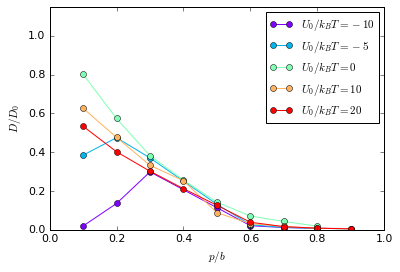

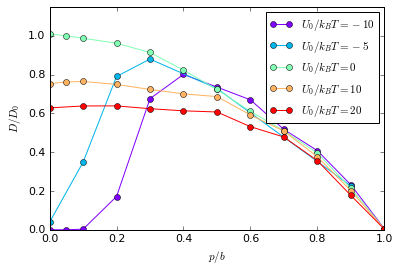

In [539]:
arr=[-10,-5,0,10,20]# U_0
labels=["$U_0/k_BT ="+str(u)+"$" for u in arr]#,'$W=2$, no lubrication']

a=0.5
data=[getDop_a(a,u=u,trigger='LJ025') for u in arr]
plotdataArr(data,'p/b',labels,tofile=True,filename='D_over_p_vary_U_LJ025',xlim=[0,1])


a=0
data=[getDop_a(a,u=u,dt="0.0001",MSD='') for u in arr]
plotdataArr(data,'p/b',labels,tofile=True,filename='D_over_p_vary_U_noHI',xlim=[0,1])

## D over p vary aop

In [9]:
# get polymer system data for different n with noLub
def getDop_aop(aop,n=1,kop=0,u=0,trigger='',system='',oldLub=False):
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    kstr='1.000' # needed in case of kop=0
    folder=initfolder
    data=[]
    if u!=0 and kop==0:
        print("ERROR: if u!=0 you need to define kop!=0")
        return 
    if n==1: 
        folder+="/"+trigger+"/dt0.001/t200/"
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger+"/dt0.001/t200/"
    #print(folder)
    for adir in os.listdir(folder): 
        if "DS" in adir: continue
        a=float(adir[1:])
        p=a/aop
        pstr='%s' % float('%g' % p)
        pstr=pstr.rstrip('0').rstrip(".")
        pdir='p'+pstr
        arel=(float(a)/10.)                 # make p value p/b
        prel=p/10.
        if kop!=0 and u!=0:
            k=kop*p
            kstr="{0:.3f}".format(k)
        file=os.path.join(folder,adir,'d0/b'+str(b),pdir,'k'+kstr+'/u'+str(u)+'/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

### Plots for the report

$a/p=0.25$ [ 23.26517412   0.73119255]
$a/p=0.25$ no Lub [ 22.83772319   0.7453464 ]
$a/p=0.5$ [ 10.6130383    0.75915471]
$a/p=0.5$ no Lub [ 11.94822453   0.83266093]
$a/p=0.5$ No HI [ 24.26195681   1.56628446]


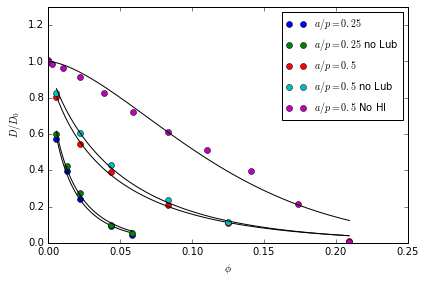

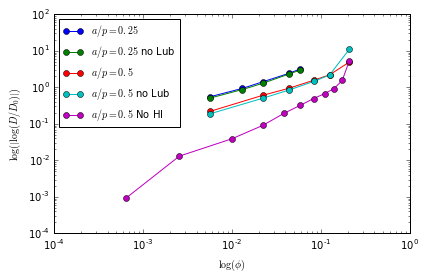

In [12]:
aopArr=[]
data=[]
labels=[]

aop=0.25
datanL25=getDop_aop(aop,trigger='noLub/steric',system='')#Data running on yoshi
dataLJ25=getDop_aop(aop,trigger='LJ',system='')
aopArr+=2*[aop]
data+=[dataLJ25]+[(datanL25)]
labels+=['$a/p=0.25$','$a/p=0.25$ no Lub']

aop=0.5
datanL5=getDop_aop(aop,trigger='noLub/steric',system='')
dataLJ5=getDop_aop(aop,trigger='LJ025',system='')
aopArr+=2*[aop]
data+=[dataLJ5]+[(datanL5)]
labels+=['$a/p=0.5$','$a/p=0.5$ no Lub']

a=0
aopNoHI=0.5
datanoHI=getDop_a(a,u=0,MSD='',dt='0.0001')
datanoHI[:,0]=datanoHI[:,0]/(1.+aopNoHI)
aopArr+=[aopNoHI]
data+=[datanoHI]
labels+=['$a/p='+str(aopNoHI)+'$ No HI']

plotDoPhivarylub(aop,data,labels,aopArr=aopArr,tofile=True,filename='D_over_phi_aop_05_025_lubnolub',fitexp=True,plotfit=True,lt='o')
plotDoPhivarylub(aop,data,labels,aopArr=aopArr,loglog=True,tofile=True,filename='D_over_phi_aop_05_025_lubnolub_log')
#plotDopvarylub(data,labels,tofile=True,filename='D_over_a_aop_05_025_lubnolub',fitexp=True)
#plotDopvarylub(data,labels,loglog=True,tofile=True,filename='D_over_a_aop_05_025_lubnolub_log')

### Single Monomer Systems

full HI [ 6.99518626  0.70418248]
no lubrication [ 10.73763706   0.92123532]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


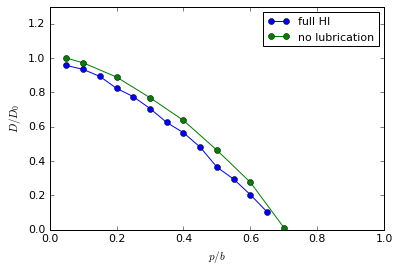

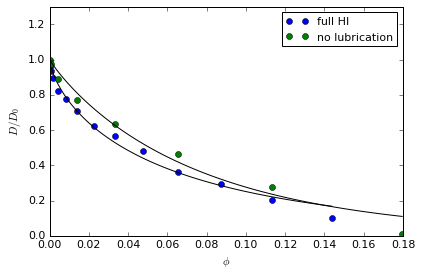

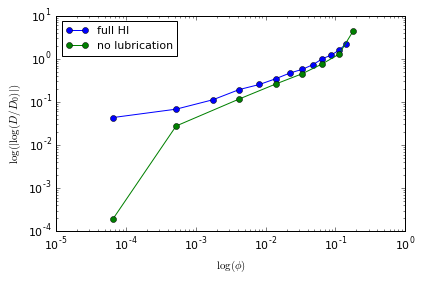

In [529]:
aop=1
W=4
dataSSW3nL=getDop_aop(aop,W,trigger='noLub/steric',system='test/EwaldTest1')
#dataSSW3Lub=getDop_aop(aop,W,trigger='',system='test/EwaldTest1')
#dataSSW3oldLub=getDop_aop(aop,W,trigger='',system='test/EwaldTest1',oldLub=True)
dataSSW3=[dataSSW3Lub]+[(dataSSW3nL)]#+[dataSSW3oldLub]
labels=['full HI','no lubrication']#,'old']
plotDopvarylub(dataSSW3,labels,tofile=True,filename='D_over_p_aop1_ET1')
#plotDopvarylub(dataSSW3,labels,loglog=True,tofile=True,filename='D_over_p_aop1_ET1_log')
plotDoPhivarylub(aop,dataSSW3,labels,monomers=True, tofile=True,filename='D_over_phi_aop1_ET1',fitexp=True,plotfit=True,lt='o')
plotDoPhivarylub(aop,dataSSW3,labels,monomers=True,loglog=True, tofile=True,filename='D_over_phi_aop1_ET1_log')

### Conclusion:
I find that it's important that lubcutint is large enough. I should use a value of 9. Alternatively, I should use a value that does not depend so much on the diameters $a$ and $p$. Otherwise, the lines will not be smooth for D over p data

full HI [ 9.04419955  0.81422237]
no lubrication [ 6.72855396  0.71545055]


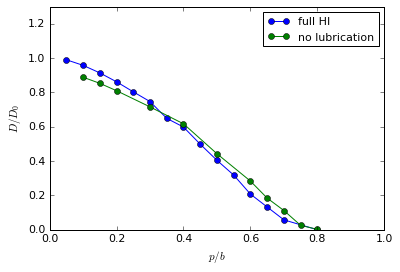

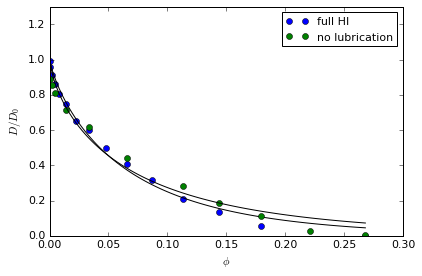

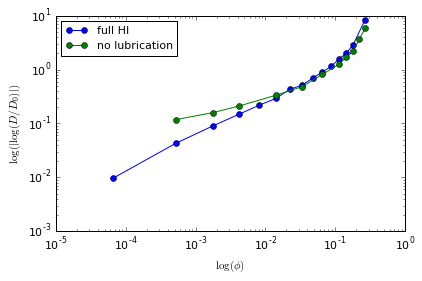

In [28]:
aop=1
W=4
dataranSW4nL=getDop_aop(aop,W,trigger='noLub/steric',system='ranSpheres/test/EwaldTest1')
dataranSW4Lub=getDop_aop(aop,W,trigger='',system='ranSpheres/test/EwaldTest1')
#dataranSW4oldLub=getDop_aop(aop,W,trigger='',system='ranSpheres/test/EwaldTest1',oldLub=True)
dataranSW4=[dataranSW4Lub]+[(dataranSW4nL)]#+[dataranSW4oldLub]
labels=['full HI','no lubrication']#,'old']
plotDopvarylub(dataranSW4,labels,tofile=True,filename='D_over_p_aop1_ET1_RMS')
#plotDopvarylub(dataranSW4,labels,loglog=True,tofile=True,filename='D_over_p_aop1_ET1_RMS_log')
plotDoPhivarylub(aop,dataranSW4,labels,monomers=True, tofile=True,filename='D_over_phi_aop1_ET1_RMS',fitexp=True,plotfit=True,lt='o')
plotDoPhivarylub(aop,dataranSW4,labels,monomers=True,loglog=True, tofile=True,filename='D_over_phi_aop1_ET1_RMS_log')

# D over phi v U_0 w LJ=0.25

* I need to record D over phi data with different U_0. For this I need to implement kop in the submit script. Evaluate it as below:

$U_0/k_BT =-10$ [ 4.4938709  0.3978544]
$U_0/k_BT =-5$ [ 8.35900542  0.67884613]
$U_0/k_BT =0$ [ 10.6130383    0.75915471]
$U_0/k_BT =10$ [ 11.66838938   0.73987164]
$U_0/k_BT =20$ [ 17.93778711   0.80431895]


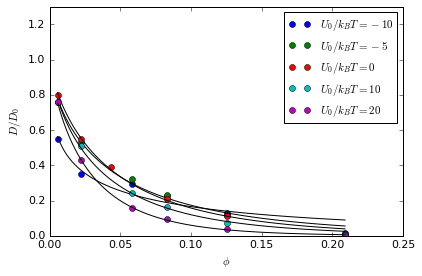

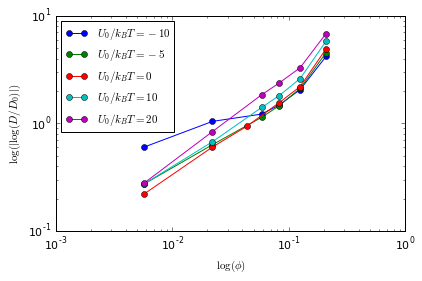

In [40]:
aop=0.5;kop=0.5;arr=[-10,-5,0,10,20]
data=[]
for u in arr:
    data.append(getDop_aop(aop,kop=kop,u=u,trigger='LJ025',system=''))
labels = [r'$U_0/k_BT ='+str(u)+'$' for u in arr]
#plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels,tofile=True,filename='D_over_phi_kop05_aop05_vary_U',fitexp=True,plotfit=True,lt='o')
plotDoPhivarylub(aop,data,labels,loglog=True,tofile=True,filename='D_over_phi_kop05_aop05_vary_U_log')

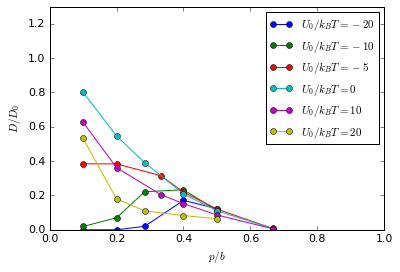

$U_0/k_BT =-20$ [ 0.70445589 -0.46388113]
$U_0/k_BT =-10$ [ 1.0941814  -0.18933948]
$U_0/k_BT =-5$ [ 3.3470024   0.28226043]
$U_0/k_BT =0$ [ 10.6130383    0.75915471]
$U_0/k_BT =10$ [ 7.55785393  0.53690775]
$U_0/k_BT =20$ [ 12.96988224   0.5711336 ]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


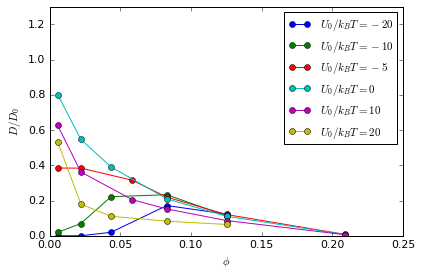

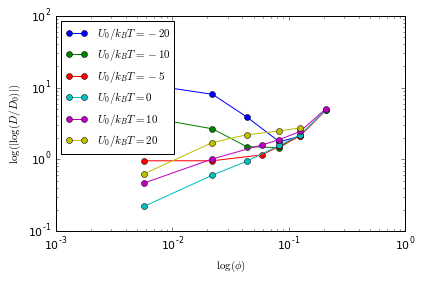

In [45]:
aop=0.5;kop=1;arr=[-20,-10,-5,0,10,20] # TODO load U=-20 data from yoshi to see how maximum changes.
data=[]
for u in arr:
    data.append(getDop_aop(aop,kop=kop,u=u,trigger='LJ025',system=''))
labels = [r'$U_0/k_BT ='+str(u)+'$' for u in arr]
plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels,tofile=True,filename='D_over_phi_kop1_aop05_vary_U')
plotDoPhivarylub(aop,data,labels,loglog=True,tofile=True,filename='D_over_phi_kop1_aop05_vary_U_log',fitexp=True)


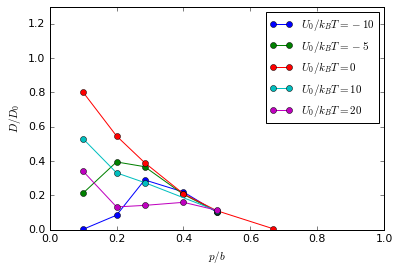

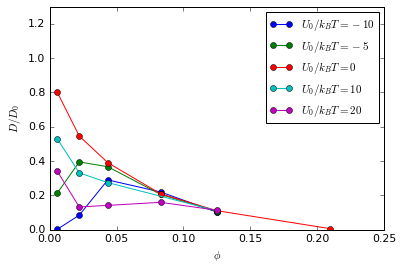

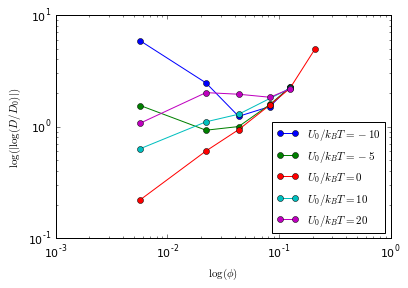

In [46]:
aop=0.5;kop=1.5;arr=[-10,-5,0,10,20] #TODO get data from yoshi for U=20 and U=-10
data=[]
for u in arr:
    data.append(getDop_aop(aop,kop=kop,u=u,trigger='LJ025',system=''))
labels = [r'$U_0/k_BT ='+str(u)+'$' for u in arr]
plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels,tofile=False)
plotDoPhivarylub(aop,data,labels,loglog=True,tofile=False)

## D over phi vary kop

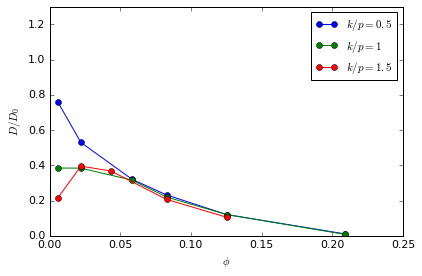

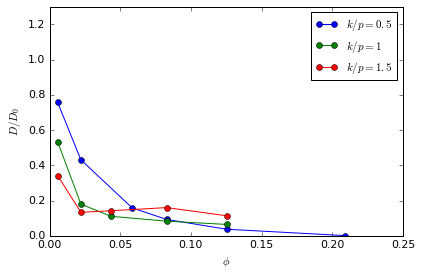

In [66]:
aop=0.5; arr=[0.5,1,1.5]
u=-5
data=[]
for kop in arr:
    data.append(getDop_aop(aop,kop=kop,u=u,trigger='LJ025',system=''))
labels = [r'$k/p ='+str(kop)+'$' for kop in arr]
#plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels,tofile=True,filename='D_over_phi_vary_kop_u-5')

u=20
data=[]
for kop in arr:
    data.append(getDop_aop(aop,kop=kop,u=u,trigger='LJ025',system=''))
labels = [r'$k/p ='+str(kop)+'$' for kop in arr]
#plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels,tofile=True,filename='D_over_phi_vary_kop_u20')

### D over U vary p 

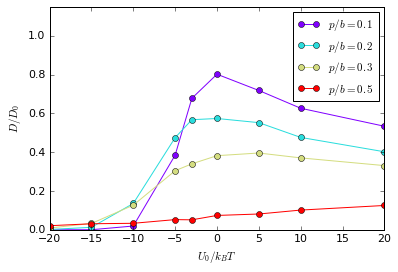

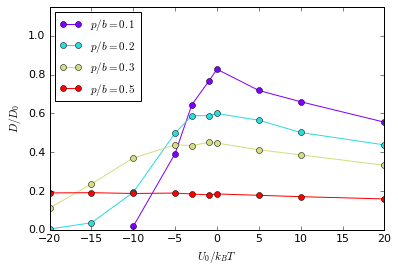

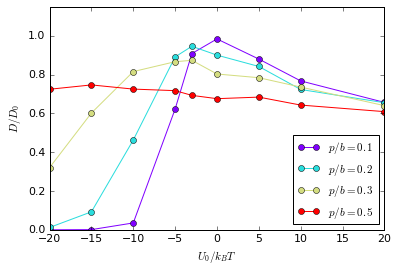

In [67]:
#### TODO LOAD DATA FOR p=5 LJ025 from yoshi with dt=0.0005
xlim=[-20,20]
arr=[1,2,3,5]
a=0.5
data=[]
for p in arr:
    data.append(getDoU_p_a_k(p,a,trigger='LJ025'))
labels = [r'$p/b ='+str(p/10.)+'$' for p in arr]
plotdataArr(data,'U_0/k_BT',labels,lineParam='',title='',linestyles='',setlog='',legendloc=0,
            tofile=True,filename='D_over_U_vary_p_LJ025',xlim=xlim)
# No Lub
data=[]
for p in arr:
    data.append(getDoU_p_a_k(p,a,trigger='noLub/steric'))
labels = [r'$p/b ='+str(p/10.)+'$' for p in arr]
plotdataArr(data,'U_0/k_BT',labels,lineParam='',title='',linestyles='',setlog='',legendloc=0,tofile=True,
            filename='D_over_U_vary_p_noLub',xlim=xlim)

# No HI TODO Reload data from sheldon
arr=[1.5,2.5,3.5,5.5]
a=0
data=[]
for p in arr:
    data.append(getDoU_p_a_k(p,a,dt="0.0005",MSD='MSD'))
labels = [r'$p/b ='+str((p-0.5)/10.)+'$' for p in arr]
plotdataArr(data,'U_0/k_BT',labels,lineParam='',title='',linestyles='',setlog='',legendloc=0,
            tofile=True,filename='D_over_U_vary_p_noHI',xlim=xlim)

## D over U vary PHI 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


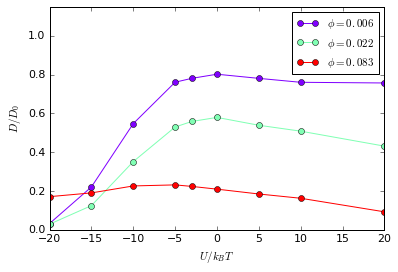

In [327]:
arr=[0.5,1,2] #values for a
aop=0.5
kop=0.5
data=[]
for a in arr:
    p=a/aop
    k=kop*p
    kstr="{0:.3f}".format(k)
    data.append(getDoU_p_a_k(p=p,a=a,k=kstr,trigger='LJ025'))
labels = [r'$\phi ='+("{0:.3f}".format(phi(a/10.)))+'$' for a in arr]
plotdataArr(data,'U/k_BT',labels,lineParam='',title='',linestyles='',setlog='',legendloc=0,
            tofile=True,filename='D_over_U_vary_phi_LJ025_aop05_kop05',xlim=[-20,20])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


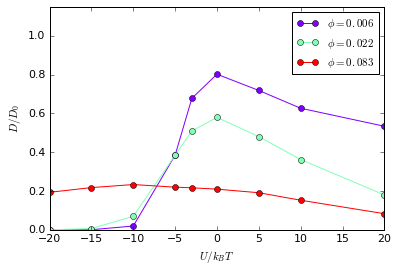

In [328]:
arr=[0.5,1,2] #values for a
aop=0.5
kop=1
data=[]
for a in arr:
    p=a/aop
    k=kop*p
    kstr="{0:.3f}".format(k)
    data.append(getDoU_p_a_k(p=p,a=a,k=kstr,trigger='LJ025'))
labels = [r'$\phi ='+("{0:.3f}".format(phi(a/10.)))+'$' for a in arr]
plotdataArr(data,'U/k_BT',labels,lineParam='',title='',linestyles='',setlog='',legendloc=0,
            tofile=True,filename='D_over_U_vary_phi_LJ025_aop05_kop1',xlim=[-20,20])

### Conclusion:
- Interesting behavior: Increasing the polymer volume fraction decreases the effect of the interaction potential for $U_0<0$, but seems to increase it for $U_0<0$.
- This leads to an **Inversion of the charge asymmetry**, i.e repulsive interactions lead to a stronger hindrance than attractive interaction. 
- There is even an increase in diffusivity towards increasing attractive interactions for $\phi=0.083$.
- k/p is related to the ion concentration. Hence, comparing both figures, we see that changing the ion concentration has a much weaker effect at large $\phi=0.83$, comared to smaller $\phi$, i.e. the $\phi=0.83$ lines are almost identical in both figures.

## D over epsilonLJ for U_0=-10 and p=5 !!!

In [31]:
def getDoTrig(triggerArr,a,p,k='1.000',u=0,oldLub=False,dt="0.001",b=10):
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"
    folder=initfolder
    data=[]
    folderadd="dt"+dt+"/t200/a"+astr+"/d0/b"+str(b)+"/p"+str(p)+"/k"+k+'/u'+str(u)
    for trigger in triggerArr: 
        file=os.path.join(folder,str(trigger),folderadd,'InstantValues/linear_fit_parametersMSD.txt')
        if trigger=="NoHI":
            file=root+"/Documents/workspace-cpp/SingleParticleSimulation/sim_dataOLD/noreset/dt"+dt+"/t200/d0/b10/p"+str(p)+"/k"+k+'/u'+str(u)
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([0,float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

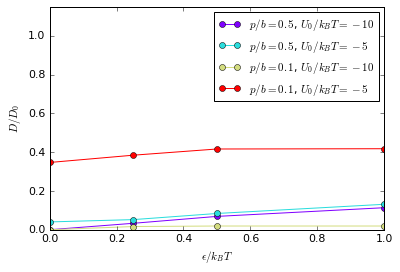

In [69]:
a=0.5; 
data=[]; lineArr=[]
p=5
us=[-10,-5]
lineArr+=['$p/b='+str(p/10.)+'$, $U_0/k_BT='+str(u)+'$' for u in us]
trigArr=["","LJ025","LJ05","LJ"]
epsArr=[0,0.25,0.5,1]
data+=[getDoTrig(trigArr,a=a,p=p,u=u) for u in us]
p=1
lineArr+=['$p/b='+str(p/10.)+'$, $U_0/k_BT='+str(u)+'$' for u in us]
data+=[getDoTrig(trigArr,a=a,p=p,u=u) for u in us]
for dat in data:
    dat[:,0]=epsArr
    #dat=np.sort(dat,axis=0)
plotdataArr(data,r"\epsilon/k_BT",lineArr,tofile=True,filename='D_over_eps')


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
# OLD STUFF
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


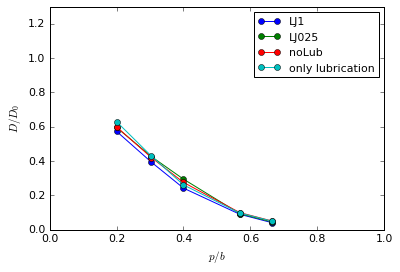

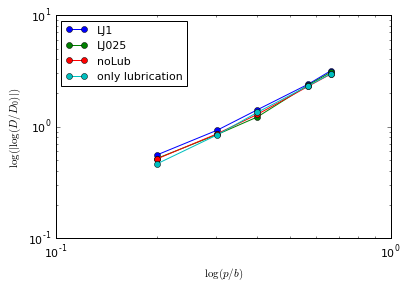

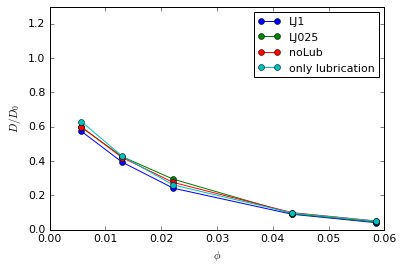

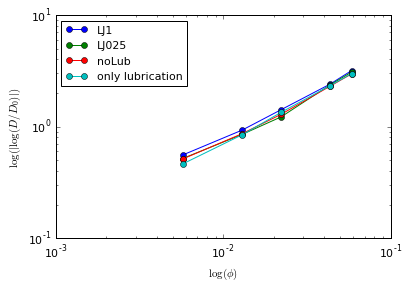

In [244]:
aop=0.25
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLubnS=getDop_aop(aop,trigger='',system='')
#dataLubster=getDop_aop(aop,trigger='steric',system='')
dataLJ1=getDop_aop(aop,trigger='LJ',system='')
#dataLJ05=getDop_aop(aop,trigger='test/epsilon0.5/LJ',system='')
dataLJ025=getDop_aop(aop,trigger='test/epsilon0.25/LJ',system='')
data=[dataLJ1]+[dataLJ025]+[(datanL)]+[dataLubnS] #+[dataLubster]
labels=['LJ1','LJ025','noLub','only lubrication'] #,'lubrication+steric']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)

In [79]:
aop=0.5
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLubnS=getDop_aop(aop,trigger='',system='')
#dataLubster=getDop_aop(aop,trigger='steric',system='')
dataLJ1=getDop_aop(aop,trigger='LJ',system='')
dataLJ05=getDop_aop(aop,trigger='test/epsilon0.5/LJ',system='')
dataLJ025=getDop_aop(aop,trigger='test/epsilon0.25/LJ',system='')

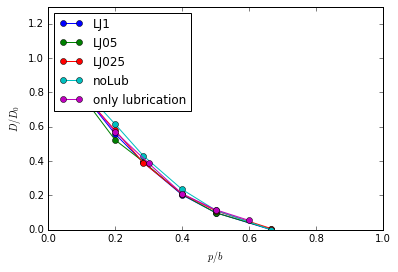

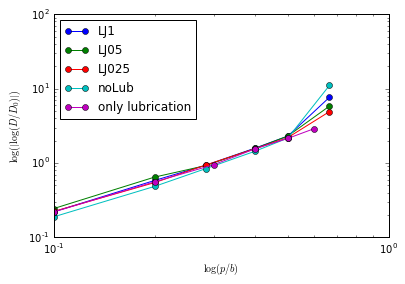

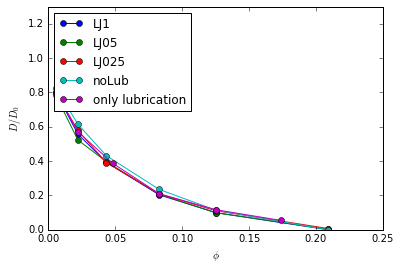

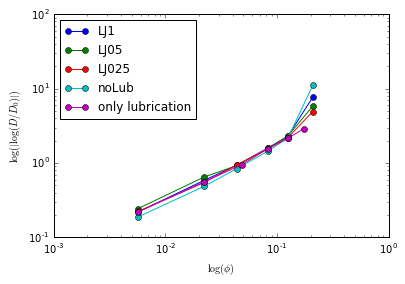

In [39]:

data=[dataLJ1]+[dataLJ05]+[dataLJ025]+[(datanL)]+[dataLubnS] #+[dataLubster]
labels=['LJ1','LJ05','LJ025','noLub','only lubrication'] #,'lubrication+steric']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)

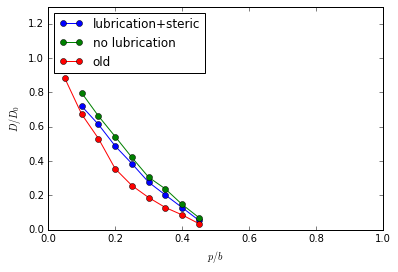

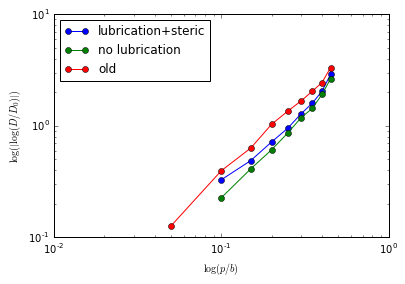

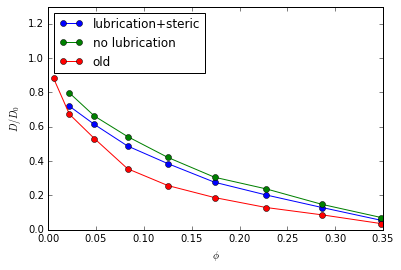

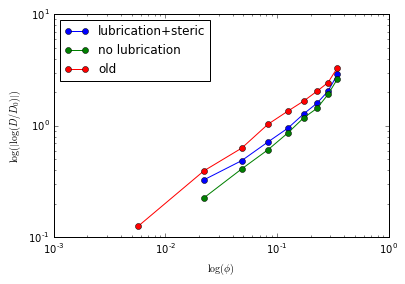

In [29]:
aop=1
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLubster=getDop_aop(aop,trigger='steric',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLubster]+[(datanL)]+[dataoldLub]
labels=['lubrication+steric','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)

#### Conclusion:
- For the reasons given below; My model only serves as a useful approximation, for small aop, i.e. when the polymer chain diameter is smaller than the particle radius. Otherwise, approximating the cylinder with adjacent spheres leads to bad results.
- With lubrication we do not really see a stretched exp anymore.
- When comparing my data to Phillips1990 I see that at large $\phi$ lubrication effects become stronger, in accordance to Phillips data. Here, in contrast, lubrication effects seem to be strongest for small $\phi$. This occurs, since at small $\phi$, i.e. small $a$ and small $p$, the cylinders along the edge of the simulation box are modeled using more beads, which leads to a stronger hindrance effect due to lubrication. This counter-intuitive behavior is an artifact that stems from approximating the cylinder HI with adjacent spheres, which leads to an incorrect lubrication, since there are no lubrication effects close to the cylinder surface on most points of the surface between two beads.

In [ ]:
aop=2
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='steric',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

In [ ]:
aop=0.5
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='steric',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

In [18]:
for a in range(1,5):
    print('a =',a,":  10%a =",10%a)

a = 1 :  10%a = 0
a = 2 :  10%a = 0
a = 3 :  10%a = 1
a = 4 :  10%a = 2
